In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 3.66MB/s]


In [5]:
!unzip /content/customer-segmentation-tutorial-in-python.zip

Archive:  /content/customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("/content/customer-segmentation-tutorial-in-python.zip")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [29]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])

In [31]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [32]:
df = df.drop(columns=['CustomerID'], axis=1)

In [33]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
columns = df.columns


df_normalized = norm.fit_transform(df)

df_normalized_df = pd.DataFrame(df_normalized, columns=columns)

In [34]:
df_normalized_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.021780,0.413826,0.326705,0.849433
1,0.011762,0.247008,0.176434,0.952743
2,0.000000,0.760286,0.608229,0.228086
3,0.000000,0.280697,0.195267,0.939723
4,0.000000,0.580683,0.318439,0.749269


In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

In [36]:
error=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(df_normalized_df)
  error.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [37]:
error

[25.46451234419434,
 15.234773265870427,
 9.487845437188348,
 5.6450815836579,
 3.7152697048866608,
 3.0951665151845873,
 2.570032486596726,
 2.2507291109477308,
 2.0307655659831023,
 1.8742655993476405]

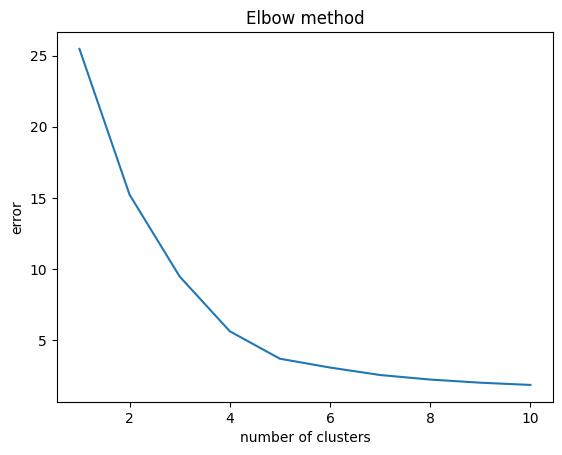

In [38]:
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

In [53]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_normalized_df)
inertia = kmeans.inertia_
print(inertia)

19.583405002234983


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [55]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_normalized_df)
inertia = kmeans.inertia_
print(inertia)

3.7152697048866608


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_clusters = 5 are ideal no. of clusters

In [39]:
km_model = KMeans(n_clusters=5,init = 'k-means++',random_state=0)
km_model.fit(df_normalized_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [40]:
pred = km_model.predict(df_normalized_df)
pred

array([3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 4, 3,
       2, 3, 2, 3, 4, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 4, 3,
       4, 3, 4, 1, 1, 4, 4, 1, 1, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 1,
       4, 4, 1, 1, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1,
       1, 4, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 4, 4,
       4, 1, 1, 1, 1, 1, 4, 4, 4, 4, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [41]:
df_normalized_df['cluster'] = pred

In [42]:
def seg(str_x, str_y, clusters):
  x = []
  y = []

  for i in range(clusters):
    x.append(df_normalized_df[str_x][df_normalized_df['cluster']==i])
    y.append(df_normalized_df[str_y][df_normalized_df['cluster']==i])

  return x,y

def plot_clusters(str_x, str_y, clusters):
  plt.figure(figsize = (5,5), dpi = 120)

  x,y = seg(str_x, str_y, clusters)

  for i in range(clusters):
    plt.scatter(x[i], y[i], label = 'cluster{}'.format(i))

  plt.xlabel(str_x)
  plt.ylabel(str_y)
  plt.title(str(str_x+" Vs "+str_y))
  plt.legend()

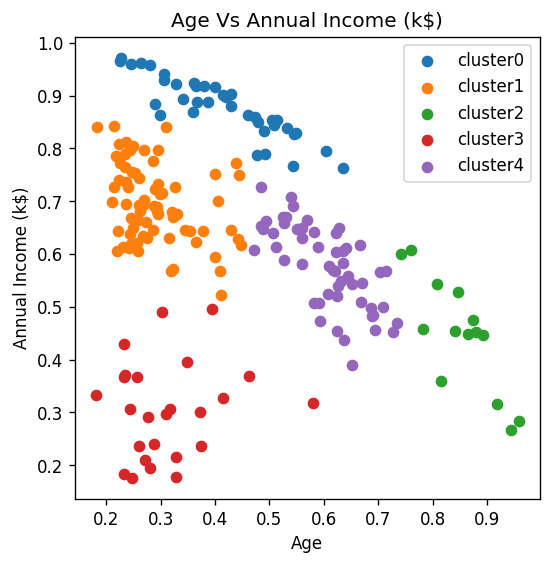

In [43]:
plot_clusters('Age', 'Annual Income (k$)',5)

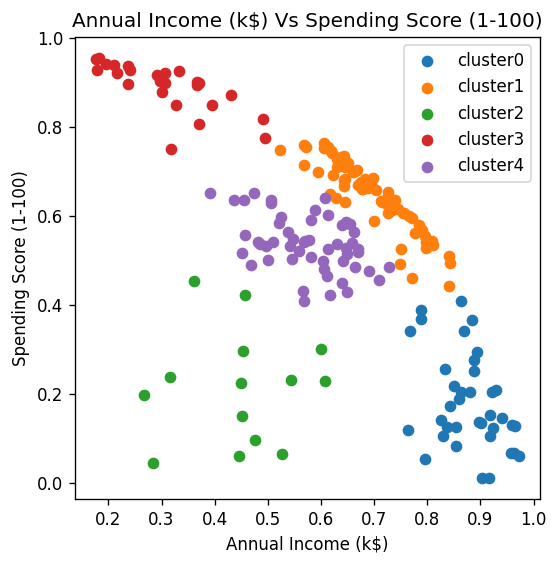

In [48]:
plot_clusters('Annual Income (k$)', 'Spending Score (1-100)',5)

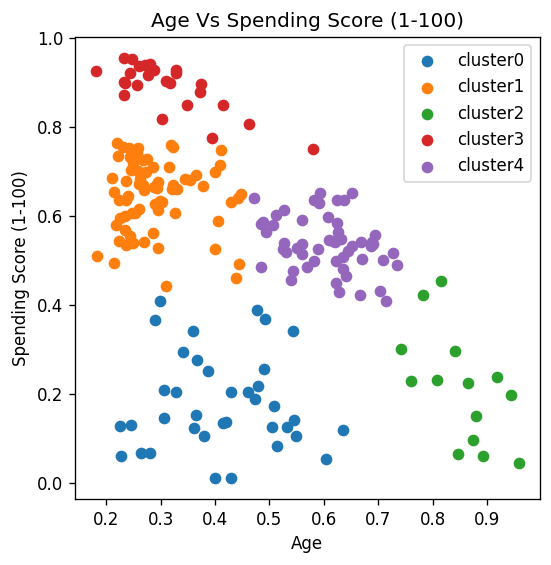

In [44]:
plot_clusters('Age', 'Spending Score (1-100)',5)